In [1]:
from pathlib import Path

import calplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors

In [2]:
def report_na(df, col):

    print(
        "{:0.2f}% rows do not contain {:} recommendation".format(
            100 * df[col].isna().mean(), col
        )
    )

# import data

In [3]:
fln = "surfweer_data_2021_01_26_clean.csv"

In [4]:
df = pd.read_csv(
    fln,
    index_col=0,
    parse_dates=["report_date", "post_date"],
    dtype={"wetsuit": "str", "schoen": "str", "cap": "str"},
)
df["week"] = df["report_date"].apply(lambda x: x.isocalendar()[1])
df["weekday"] = df["report_date"].apply(lambda x: x.weekday())

# calendar heatmap

In [5]:
df["test"] = 1
df_sub = df[["report_date", "test"]]
df_sub = df_sub.drop_duplicates()

In [6]:
events = pd.Series(df_sub["test"].to_numpy(), index=df_sub["report_date"])

In [7]:
cmap = colors.ListedColormap(["xkcd:ocean blue", "green"])

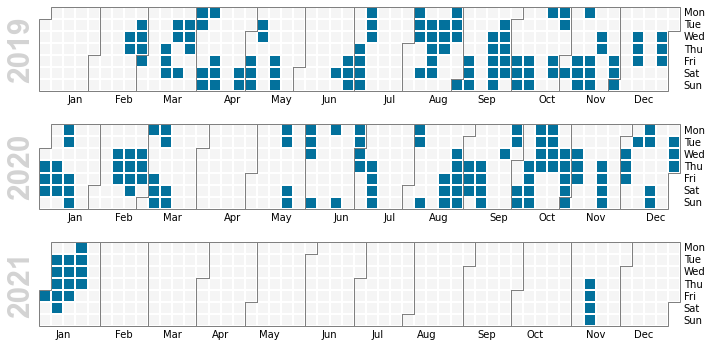

In [8]:
calplot.calplot(events, cmap=cmap);

# monthly surf days

In [9]:
df_monthly = df.groupby(["year", "month"])["report_date"].count()

In [10]:
df_monthly = df_monthly.reset_index()

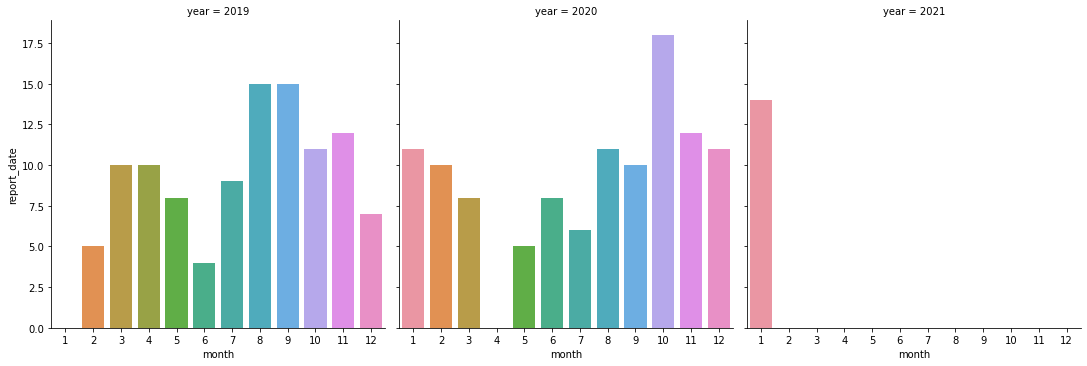

In [11]:
sns.catplot(x="month", y="report_date", col="year", data=df_monthly, kind="bar")

# wetsuit

## preprocessing wetsuit thickness
As per [srface](https://srface.com/knowledge-base/neoprene-wetsuit-thickness/), *brands usually advertise their wetsuit neoprene thicknesses as 3/2, 4/3, 5/4, 6/4, etc. 3/2 for instance, means this wetsuit’s main panels are 3mm and 2mm thick. Normally, the chest and back panels are made out of thicker neoprene foam for extra warmth. Arms, shoulders, and legs are usually thinner for more flexibility.* 

I chose to use the main panel thickness only in the analysis, to reduce the number of types. It will be renamed using 3, 4, 5, 6. 

In [12]:
def rename_wetsuit(wet_suit):
    """
    Rename wetsuit, use only the main panel thickenss (the first character in the string)
    """
    try:
        return wet_suit[0]
    except:
        pass

In [13]:
df["wetsuit"] = df["wetsuit"].apply(rename_wetsuit)

In [14]:
def sort_hue(values):
    """sort string list
    """
    values.sort(key=float)
    return values


def monthly_summary(df, item):

    # Create monthly summary
    monthly = df.groupby(["month", item])["report_date"].count()
    monthly = monthly.reset_index()
    values = list(monthly[item].unique())

    # plot
    ax = sns.histplot(
        x="month",
        weights="report_date",
        hue=item,
        data=monthly,
        multiple="stack",
        bins=12,
        discrete=True,
        hue_order=sort_hue(values),
        shrink=0.8,
    )

    ax.set_xlabel("month")
    ax.set_ylabel("days")
    ax.set_xticks(np.arange(1, 12 + 1, 1.0))
    ax.set_xticklabels(
        [
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ]
    )

    labels = ["{:} mm".format(value) for value in sort_hue(values)]
    ax.legend(
        title=item, labels=labels,
    )

    return ax

## cap

87.83% rows do not contain cap recommendation


<AxesSubplot:xlabel='month', ylabel='days'>

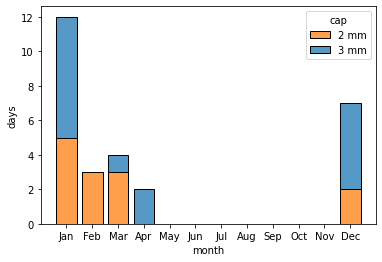

In [15]:
report_na(df, "cap")
monthly_summary(df, "cap")

## schoen

61.30% rows do not contain schoen recommendation


<AxesSubplot:xlabel='month', ylabel='days'>

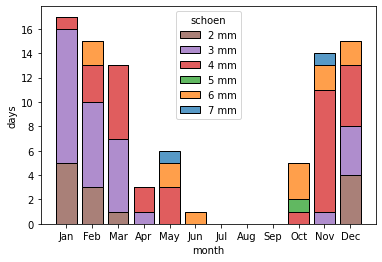

In [16]:
report_na(df, "schoen")
monthly_summary(df, "schoen")

## wetsuit

18.70% rows do not contain wetsuit recommendation


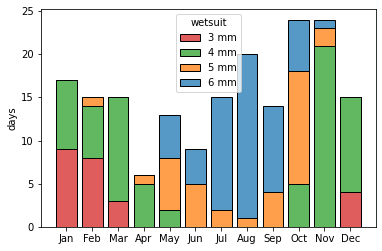

In [17]:
report_na(df, "wetsuit")
ax = monthly_summary(df, "wetsuit")
ax.set_xlabel('')
fig = ax.figure